In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [40]:
# load the dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df= pd.read_table(url, header = None, names = ['label','message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
# preporocessing
# Convert labels to 0/1
df['label'] = df['label'].map({'ham':0, 'spam': 1})


# Drop any rows where label became NaN
df = df.dropna(subset=['label'])


# Creating fearutes and labels
x = df['message']
y = df['label']

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#TF-IDF vectorizer
tfidf = TfidfVectorizer()
x_train_vec = tfidf.fit_transform(x_train)
x_test_vec = tfidf.transform(x_test)



Accuracy: 0.9748878923766816

Confusion Matrix:
 [[966   0]
 [ 28 121]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



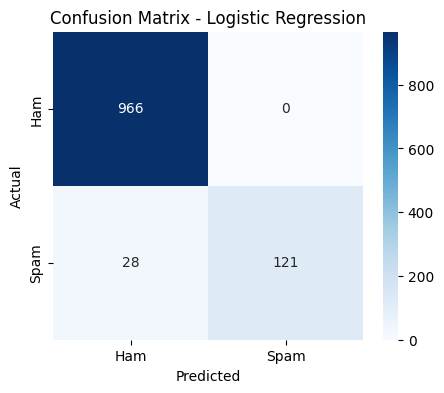

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_vec, y_train)

# Predict on test set
y_pred = model.predict(x_test_vec)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [43]:
def predict_message(msg):
    vec = tfidf.transform([msg])  # use the same fitted tfidf
    pred = model.predict(vec)[0]
    label = "Spam" if pred == 1 else "Ham"
    print(f"Prediction: {label}")


In [44]:
predict_message("WINNER!! Claim your $1000 Walmart gift card now.")
predict_message("Let's grab coffee this evening?")

Prediction: Spam
Prediction: Ham


In [45]:
print(model.predict(tfidf.transform(["win cash now"]))[0])


1


In [46]:
import numpy as np

#Get model coefficients and feature names
feature_names = np.array(tfidf.get_feature_names_out())
coef = model.coef_[0]

#Top 20 spammy words (most positive coefficients)
top_spam_indices =np.argsort(coef)[-20:]
top_spam_words = feature_names[top_spam_indices]
top_spam_scores = coef[top_spam_indices]

#Top 20 hammy words (most negative coefficients)
top__ham_indices = np.argsort(coef)[:20]
top_ham_words = feature_names[top__ham_indices]
top_ham_scores = coef[top__ham_indices]

print("Top 20 spammy words:")
for word, score in zip(reversed(top_spam_words), reversed(top_spam_scores)):
    print(f"{word}: {score:.4f}")

print("\nTop 20 hammy words:")
for word, score in zip(top_ham_words, top_ham_scores):
    print(f"{word}:{score:.2f}")






Top 20 spammy words:
call: 4.1191
txt: 4.0794
free: 3.2895
stop: 3.2782
text: 3.2481
reply: 2.9567
claim: 2.9555
www: 2.9524
mobile: 2.8636
uk: 2.8351
to: 2.7189
150p: 2.5913
50: 2.3478
your: 2.2767
service: 2.2741
or: 2.2683
from: 2.2418
win: 2.1572
won: 2.1182
prize: 2.1146

Top 20 hammy words:
me:-2.61
my:-2.22
ok:-1.67
that:-1.62
ll:-1.59
gt:-1.59
lt:-1.58
can:-1.57
how:-1.48
it:-1.48
sorry:-1.43
later:-1.41
at:-1.37
come:-1.35
but:-1.35
what:-1.27
home:-1.27
when:-1.23
am:-1.23
in:-1.20


In [47]:
def plot_top_words(words, scores, title, color):
    plt.figure(figsize=(10,6))
    y_pos = np.arange(len(words))
    plt.barh(y_pos, score, color= color)
    plt.yticks(y_pos, words)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Model Coefficient')
    plt.grid(axis='x', linestyle= '--', alpha = 0.6)
    plt.tight_layout()
    plt.show



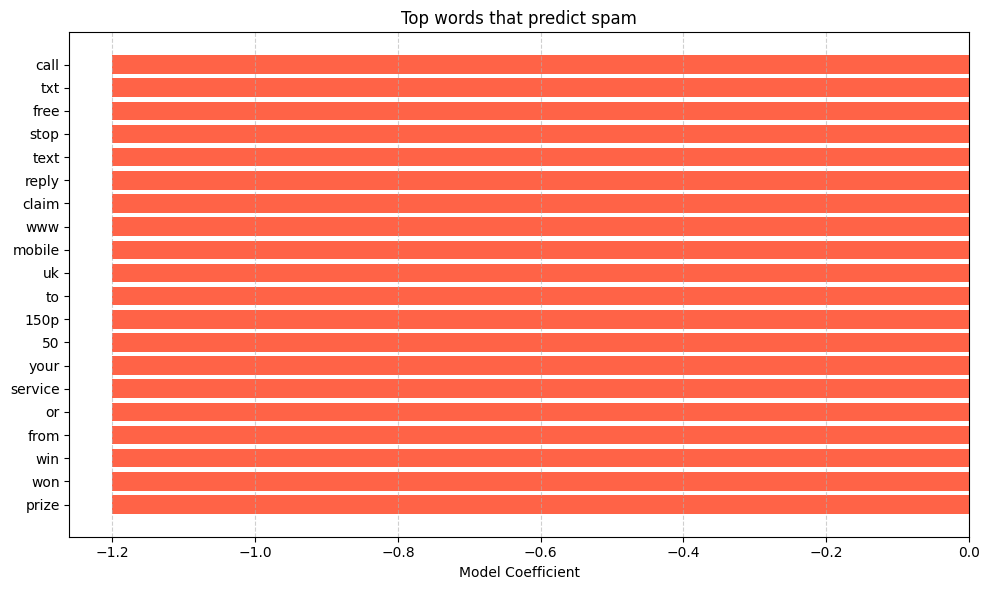

In [48]:
#plot spammy words
plot_top_words(
    list(reversed(top_spam_words)),
    list(reversed(top_spam_scores)),
    title = "Top words that predict spam",
    color = 'tomato'
)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13200\3138324233.py:10: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


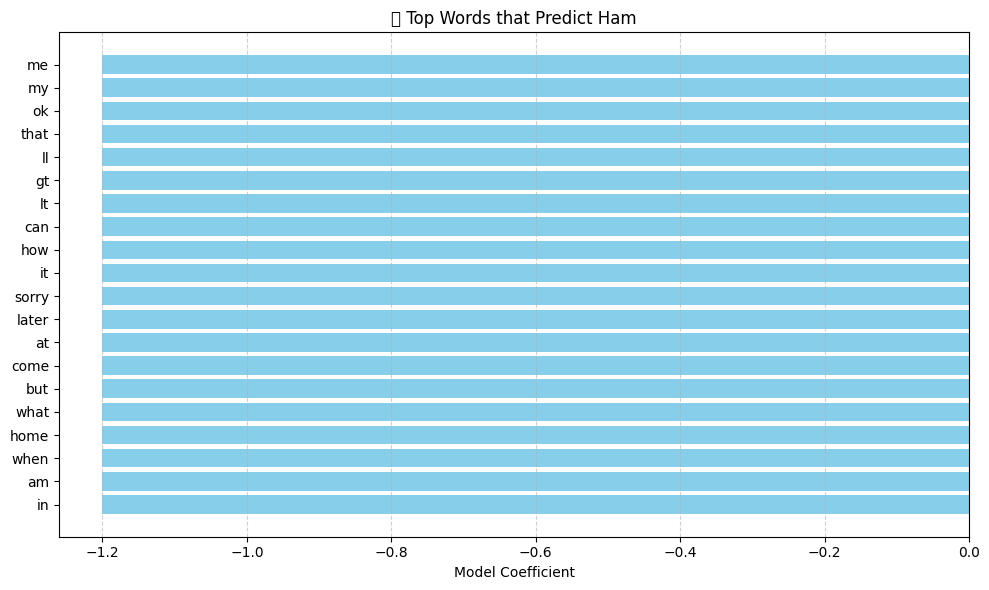

In [49]:

# Plot hammy words
plot_top_words(
    top_ham_words,
    top_ham_scores,
    title="💬 Top Words that Predict Ham",
    color="skyblue"
)